# 데이터 불러오고 결합하기

In [1]:
import pandas as pd

In [2]:
df_total=pd.DataFrame()

In [3]:
## 파일 불러오고 합치기
df_total=pd.DataFrame()
for i in range (1,81,1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])

In [4]:
df_total

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,20200328232420,20200328232628,200,양덕-남구청(야구장)-구룡포,일반,N,N,형산로터리,129.368470,36.011630,뱃머리 평생학습원,129.354538,36.009020
3871,20200328232523,20200328233525,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북구보건소,129.379384,36.070790,삼성쉐르빌,129.405302,36.086089
3872,20200328232554,20200328233435,160,문덕-대송-송도-죽도-용흥,일반,N,N,북구청,129.367128,36.041941,송림초등학교,129.375650,36.029730
3873,20200328232722,20200328235259,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,SK뷰2차,129.340636,36.008334


# 컬렴명 한글으로 변경하기

In [5]:
col_name = pd.read_excel('./포항/trfcard(1)/trfcard_columns.xlsx', header = 2)
col_name

,구분,컬럼명 (영문),컬럼명 (한글),Not Null 여부,데이터 타입,길이,PK 정보,FK 정보,제약 조건,컬럼 설명
0,NaN,on_date,승차시각,Y,datetime,NaN,Y,NaN,NaN,NaN
1,NaN,off_date,하차시각,Y,datetime,NaN,NaN,NaN,NaN,NaN
2,NaN,route_name,노선명,Y,varchar,100,NaN,NaN,NaN,NaN
3,NaN,descr,노선설명,Y,varchar,100,NaN,NaN,NaN,NaN
4,NaN,age_type,승객연령,Y,varchar,20,NaN,NaN,NaN,NaN
5,NaN,trans_yn,환승여부,Y,varchar,1,NaN,NaN,NaN,NaN
6,NaN,addfee_yn,추가운임여부,Y,varchar,1,NaN,NaN,NaN,NaN
7,NaN,start_bstop,승차정류장,Y,varchar,100,NaN,NaN,NaN,NaN
8,NaN,start_gps_x,승차정류장 GPS X,Y,numeric,"10,7",NaN,NaN,NaN,NaN
9,NaN,start_gps_y,승차정류장 GPS Y,Y,numeric,"10,7",NaN,NaN,NaN,NaN


In [6]:
## 한글컬럼명으로 변경
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명 (한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [7]:
df_total.columns = kor_col

In [8]:
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826


In [11]:
trans = df_total[['승차정류장','환승여부']]
trans

,승차정류장,환승여부
0,양덕차고지,N
1,문덕사거리,N
2,문덕사거리,N
3,부영사랑3차,N
4,문덕온천,N
...,...,...
3870,형산로터리,N
3871,북구보건소,N
3872,북구청,N
3873,KTX포항역(시내행),N


# 정류장별 환승빈도 구하기

In [27]:
trans30 = trans[trans['환승여부']=='Y'].groupby('승차정류장').count().reset_index().sort_values('환승여부',ascending=False).reset_index(drop=True).head(30)
trans30.columns = ['승차정류장','환승빈도']

In [32]:
trans30

,승차정류장,환승빈도
0,죽도시장,11035
1,시외버스터미널,7422
2,중앙상가,3240
3,남구보건소,3215
4,구룡포환승센터,1951
5,선린병원,1670
6,육거리,1506
7,북구청,1198
8,흥해환승센터,1039
9,홈플러스,872


# 그래프 시각화

In [28]:
import matplotlib.pyplot as plt

In [29]:
k = []
for x in range(len(trans30)):
    k.append(trans30['승차정류장'][x])
k

['죽도시장',
 '시외버스터미널',
 '중앙상가',
 '남구보건소',
 '구룡포환승센터',
 '선린병원',
 '육거리',
 '북구청',
 '흥해환승센터',
 '홈플러스',
 '대동우방아파트',
 '기계환승센터',
 '양덕차고지',
 '북부시장',
 '우현경로당',
 '문덕사거리',
 '오천농협세계지점',
 '교보생명',
 'GS슈퍼마켓',
 '현대제철',
 '오거리',
 '해도119안전센터',
 '구룡포근대화거리',
 '롯데아파트',
 '오천시장',
 'SK뷰2차',
 '장성초등학교',
 '포은중앙도서관',
 '건강가정다문화센터',
 '롯데백화점']

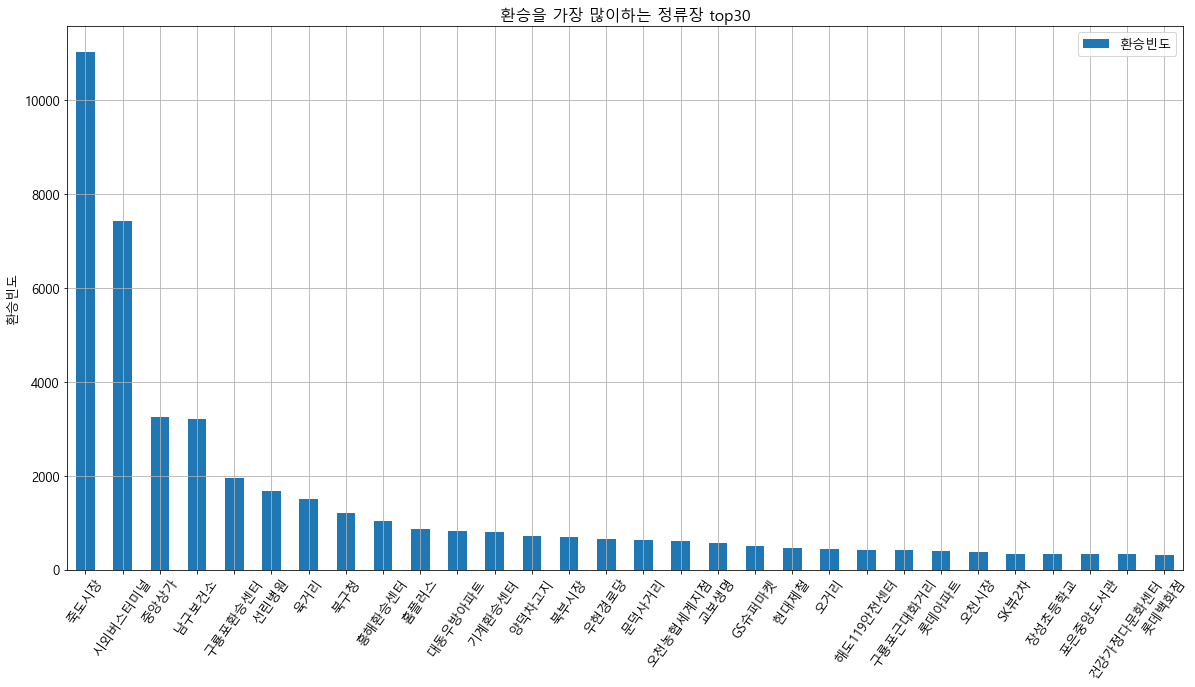

In [31]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
trans30.plot(kind='bar')

plt.title("환승을 가장 많이하는 정류장 top30")
plt.ylabel("환승빈도")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(0,30,1)], k, rotation = 55)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()